In [1]:
import numpy as np
import pandas as pd

# if seaborn is not yet installed, run `pip install seaborn` in terminal
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

sns.set()
import matplotlib.pyplot as plt

# sharper plots
%config InlineBackend.figure_format = 'retina'

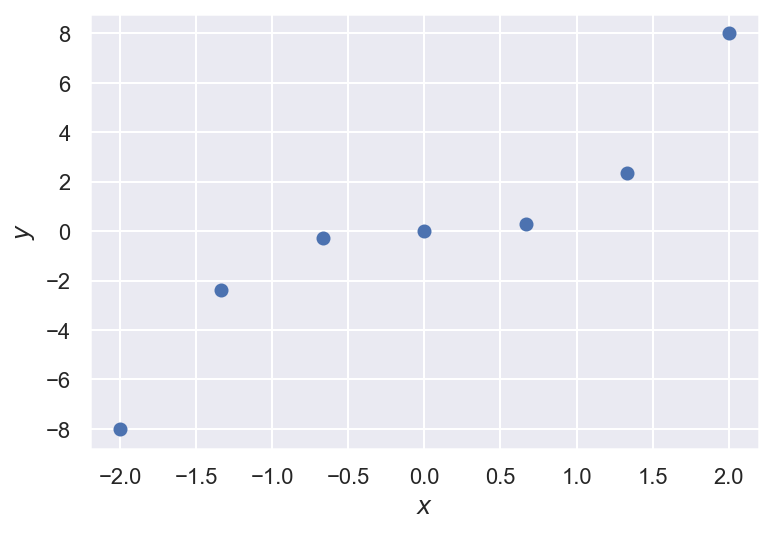

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3  # original dependecy

plt.scatter(X, y)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$");

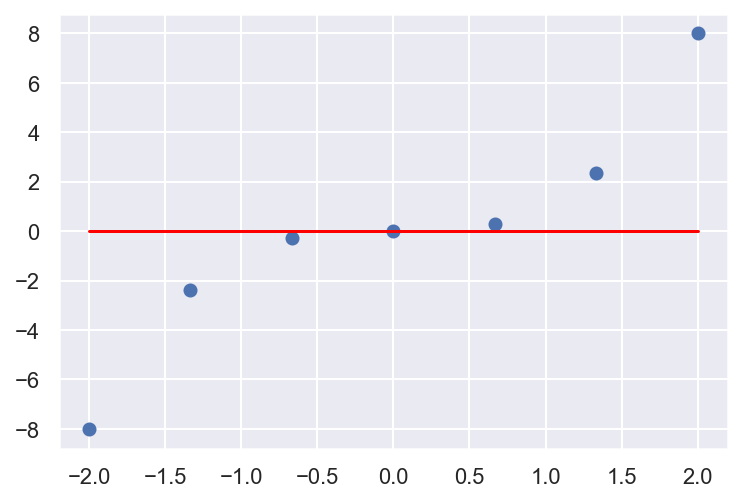

In [3]:
# Solution code
xx = np.linspace(-2, 2, 100)
predictions = [np.mean(y) for x in xx]

X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.plot(xx, predictions, c="red");

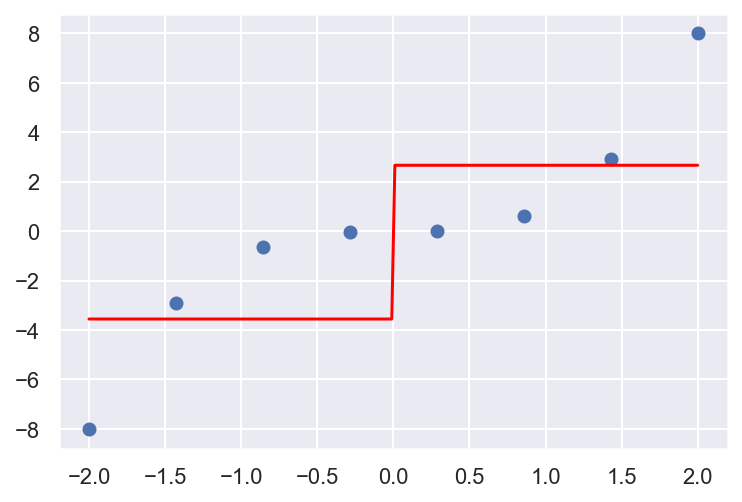

In [4]:
# Solution code
xx = np.linspace(-2, 2, 200)
predictions = [np.mean(y[X < 0]) if x < 0 else np.mean(y[X >= 0]) for x in xx]

X = np.linspace(-2, 2, 8)
y = X ** 3

plt.scatter(X, y)
plt.plot(xx, predictions, c="red");

In [5]:
def regression_var_criterion(X, y, t):
    # Solution code
    X_left, X_right = X[X < t], X[X >= t]
    y_left, y_right = y[X < t], y[X >= t]
    return (
        np.var(y)
        - X_left.shape[0] / X.shape[0] * np.var(y_left)
        - X_right.shape[0] / X.shape[0] * np.var(y_right)
    )

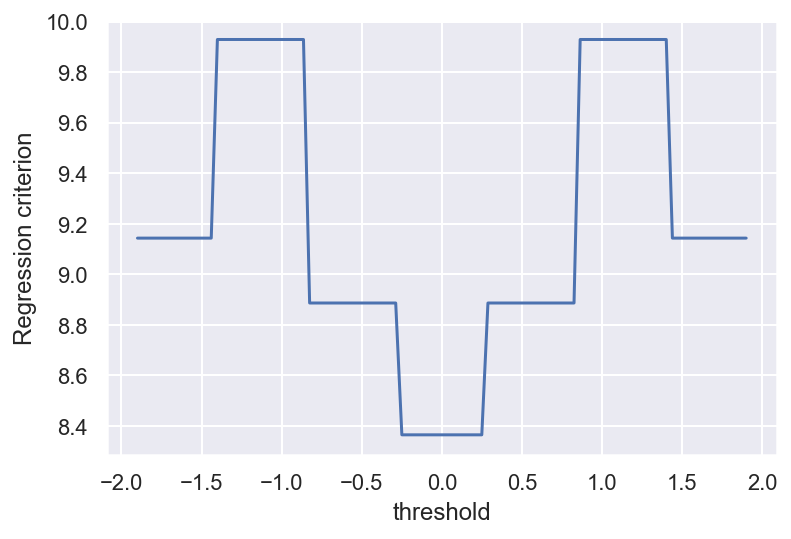

In [6]:
# Solution code
thresholds = np.linspace(-1.9, 1.9, 100)
crit_by_thres = [regression_var_criterion(X, y, thres) for thres in thresholds]

plt.plot(thresholds, crit_by_thres)
plt.xlabel("threshold")
plt.ylabel("Regression criterion");

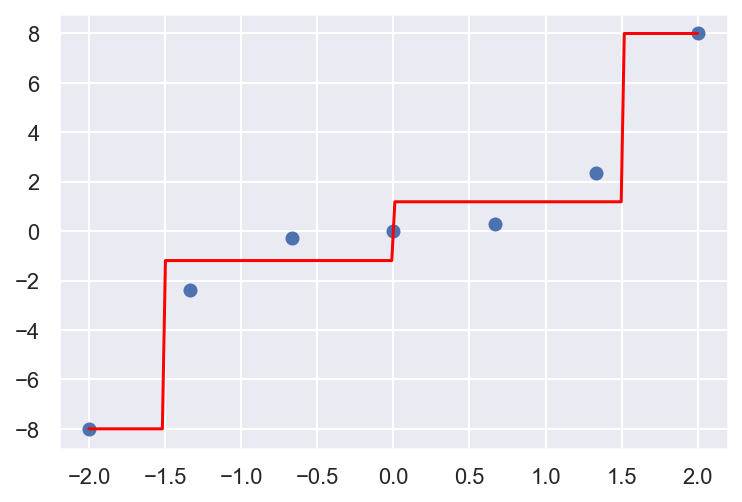

In [7]:
# Solution code
xx = np.linspace(-2, 2, 200)


def prediction(x, X, y):
    if x >= 1.5:
        return np.mean(y[X >= 1.5])
    elif x < 1.5 and x >= 0:
        return np.mean(y[(X >= 0) & (X < 1.5)])
    elif x >= -1.5 and x < 0:
        return np.mean(y[(X < 0) & (X >= -1.5)])
    else:
        return np.mean(y[X < -1.5])


predictions = [prediction(x, X, y) for x in xx]

X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.plot(xx, predictions, c="red");

In [8]:
df = pd.read_csv(
    "../../_static/data/assignment3/mlbootcamp5_train.csv", index_col="id", sep=";"
)

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# Solution code
df["age_years"] = (df.age / 365.25).astype("int")

In [11]:
# Solution code
train_df = pd.get_dummies(df, columns=["cholesterol", "gluc"]).drop(["cardio"], axis=1)
target = df.cardio

In [12]:
# Solution code
train_df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


In [13]:
# Solution code
X_train, X_valid, y_train, y_valid = train_test_split(
    train_df.values, target.values, test_size=0.3, random_state=17
)

In [14]:
# import os
# path_to_graphviz = '' # your path to graphviz (C:\\Program Files (x86)\\Graphviz2.38\\bin\\ for example)
# os.environ["PATH"] += os.pathsep + path_to_graphviz

In [15]:
# Solution code
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

In [16]:
from io import StringIO

# pip install pydotplus
import pydotplus

# Solution code
from IPython.display import Image

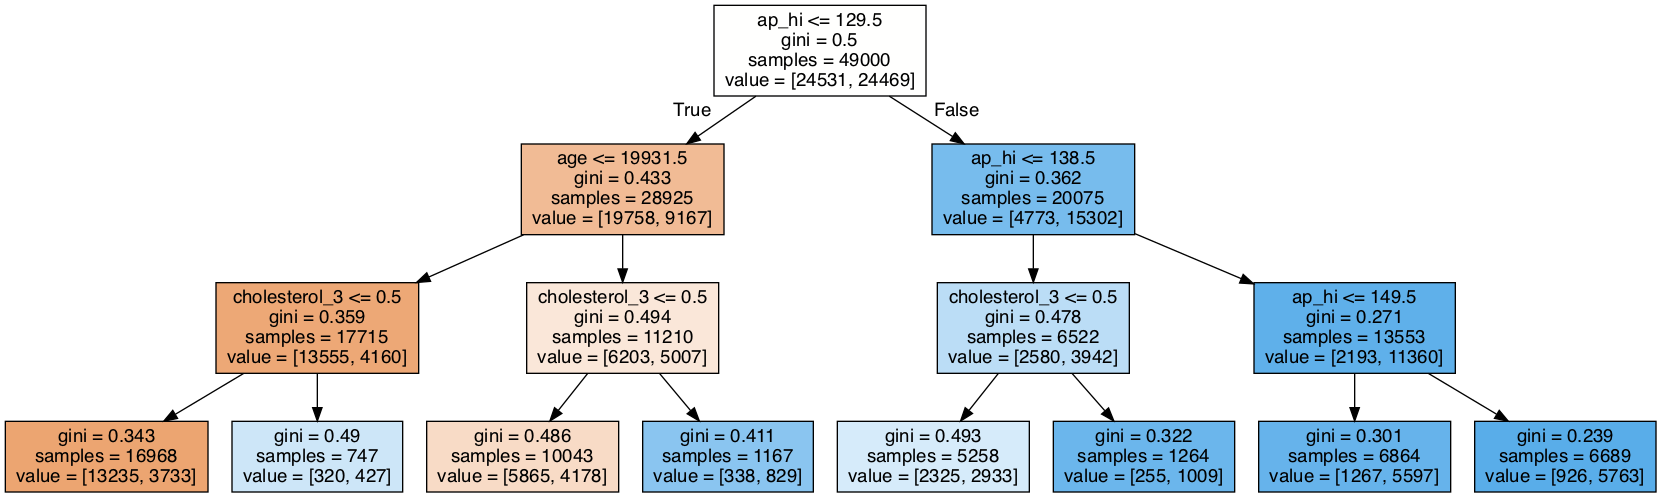

In [17]:
# Solution code
dot_data = StringIO()
export_graphviz(tree, feature_names=train_df.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [18]:
# Solution code
tree_pred_valid = tree.predict(X_valid)

In [19]:
# Solution code
tree_acc_valid = accuracy_score(y_valid, tree_pred_valid)
tree_acc_valid

0.7212857142857143

In [20]:
%%time
# Solution code
tree_params = {"max_depth": list(range(2, 11))}

tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=17), tree_params, cv=5, scoring="accuracy"
)

tree_grid.fit(X_train, y_train)

CPU times: user 2.78 s, sys: 23.7 ms, total: 2.8 s
Wall time: 2.81 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

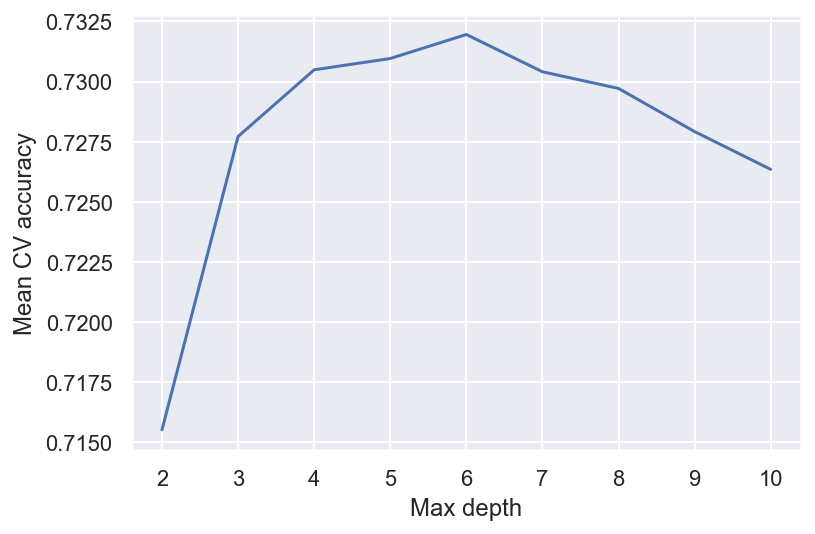

In [21]:
# Solution code
plt.plot(tree_params["max_depth"], tree_grid.cv_results_["mean_test_score"])
plt.xlabel("Max depth")
plt.ylabel("Mean CV accuracy");

In [22]:
# Solution code
print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'max_depth': 6}
Best cross validaton score 0.7319591836734693


In [23]:
# Solution code
tuned_tree_acc_valid = accuracy_score(y_valid, tree_grid.predict(X_valid))
tuned_tree_acc_valid

0.7258095238095238

In [24]:
# Solution code
(tuned_tree_acc_valid - tree_acc_valid) / tree_acc_valid * 100

0.6271869016967002

In [25]:
# Solution code
sub_df = pd.DataFrame(df.smoke.copy())
sub_df["male"] = df.gender - 1

sub_df["age_40_50"] = ((df.age_years >= 40) & (df.age_years < 50)).astype("int")
sub_df["age_50_55"] = ((df.age_years >= 50) & (df.age_years < 55)).astype("int")
sub_df["age_55_60"] = ((df.age_years >= 55) & (df.age_years < 60)).astype("int")
sub_df["age_60_65"] = ((df.age_years >= 60) & (df.age_years < 65)).astype("int")

sub_df["ap_hi_120_140"] = ((df.ap_hi >= 120) & (df.ap_hi < 140)).astype("int")
sub_df["ap_hi_140_160"] = ((df.ap_hi >= 140) & (df.ap_hi < 160)).astype("int")
sub_df["ap_hi_160_180"] = ((df.ap_hi >= 160) & (df.ap_hi < 180)).astype("int")

sub_df["chol=1"] = (df.cholesterol == 1).astype("int")
sub_df["chol=2"] = (df.cholesterol == 2).astype("int")
sub_df["chol=3"] = (df.cholesterol == 3).astype("int")

In [26]:
# Solution code
sub_df.head()

,smoke,male,age_40_50,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180,chol=1,chol=2,chol=3
id,,,,,,,,,,,,
0,0,1,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [27]:
# Solution code
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(sub_df, target)

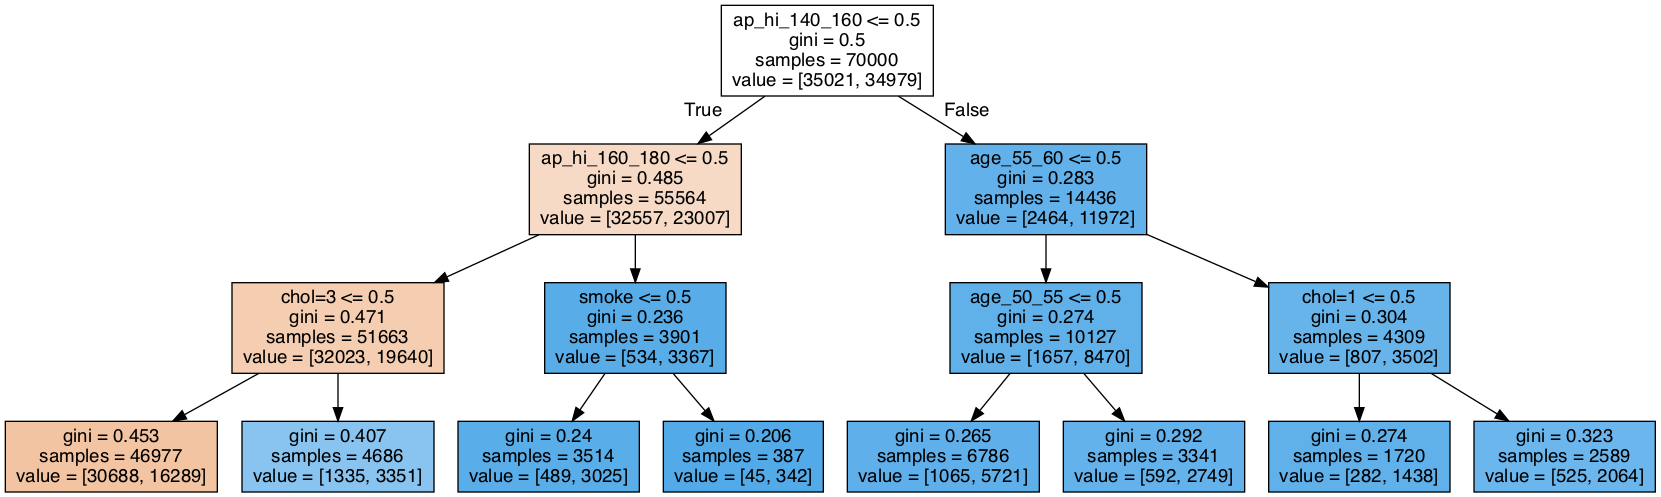

In [28]:
# Solution code
dot_data = StringIO()
export_graphviz(tree, feature_names=sub_df.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())